# Exploration of the dataset with human balance evaluations

Marcos Duarte

Here is an exploration on the data set of quantitative and qualitative evaluations of 163 subjects.  
See the companiom data set website [http://demotu.org/datasets/balance/](http://demotu.org/datasets/balance/) for more information.

First, let's import the necessary Python libraries and configure the environment:

In [1]:
import numpy as np
import pandas as pd
pd.set_option('precision', 4)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
sns.set_context("notebook", font_scale=1.4,
                rc={'font.size': 16, 'lines.linewidth': 2, 'lines.markersize': 10, 'axes.titlesize': 'x-large'})
matplotlib.rc('legend', numpoints=1, fontsize=16)
import glob
import sys, os
sys.path.insert(1, r'./../functions')

# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

import qgrid  # pip install git+https://github.com/quantopian/qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to /nbextensions folder
qgrid.set_defaults(remote_js=True, precision=2)  # Set default options by calling "set_defaults" (optional)

from AMTIbsf import loadbsf

## Load information about all files of stabilography

In [2]:
fname = 'https://raw.githubusercontent.com/demotu/datasets/master/Balance/BDSinfo.txt'
path = r'./../../../X/BDB/'
fname = os.path.join(path, 'BDSinfo.txt')
BDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(BDSinfo.Subject)), BDSinfo.shape[0], BDSinfo.shape[1]))

Information of 163 subjects loaded (1930 rows, 64 columns).


Here are the first 20 rows and 10 columns of the data:

In [3]:
BDSinfo.iloc[:20, :10]
# or use the nice qgrid library:
#qgrid.show_grid(BDSinfo.iloc[:, :10])

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI
0,BDS00001,1,Open,Firm,33.0000,Young,F,157.5,54.2,21.8493
1,BDS00002,1,Open,Firm,33.0000,Young,F,157.5,54.2,21.8493
2,BDS00003,1,Open,Firm,33.0000,Young,F,157.5,54.2,21.8493
3,BDS00004,1,Closed,Firm,33.0000,Young,F,157.5,54.2,21.8493
4,BDS00005,1,Closed,Firm,33.0000,Young,F,157.5,54.2,21.8493
5,BDS00006,1,Closed,Firm,33.0000,Young,F,157.5,54.2,21.8493
6,BDS00007,1,Open,Foam,33.0000,Young,F,157.5,54.2,21.8493
7,BDS00008,1,Open,Foam,33.0000,Young,F,157.5,54.2,21.8493
8,BDS00009,1,Open,Foam,33.0000,Young,F,157.5,54.2,21.8493
9,BDS00010,1,Closed,Foam,33.0000,Young,F,157.5,54.2,21.8493


The BDSinfo file has 1930 rows for 163 subjects because there are 12 rows for each subject related to the 12 experimental trials (6 subjects were not able to complete the most challemnging tasks). For now, to analyze the subjects's characteristics we can drop the additional rows for each subject:

In [4]:
info = BDSinfo.drop_duplicates(subset='Subject', inplace=False)
info.iloc[:10, :10]
#qgrid.show_grid(info.iloc[:, :10])

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI
0,BDS00001,1,Open,Firm,33.0000,Young,F,157.5,54.20,21.8493
12,BDS00013,2,Open,Firm,27.5833,Young,F,154.0,44.00,18.5529
24,BDS00025,3,Closed,Firm,36.9167,Young,M,161.7,63.40,24.2476
36,BDS00037,4,Open,Firm,61.7500,Old,M,164.0,68.35,25.4127
48,BDS00049,5,Closed,Firm,18.3333,Young,F,162.0,56.45,21.5097
60,BDS00061,6,Open,Foam,49.3333,Young,M,163.5,70.65,26.4288
72,BDS00073,7,Open,Firm,25.3333,Young,M,182.7,68.70,20.5816
84,BDS00085,8,Open,Foam,22.4167,Young,F,161.8,65.40,24.9816
96,BDS00097,9,Open,Firm,23.1667,Young,F,158.0,66.00,26.4381
108,BDS00109,10,Closed,Firm,26.1667,Young,F,162.7,49.10,18.5484


## Age group and gender

Here are the number of subjetcs in the data set by age group and gender:

In [5]:
info = BDSinfo.drop_duplicates(subset='Subject', inplace=False)
print('Number of subjects per group (N=%d):' %len(info))
display(info[['Subject', 'AgeGroup', 'Gender']].groupby(['AgeGroup', 'Gender']).count())

Number of subjects per group (N=163):


Subject
AgeGroup Gender         
Old      F            60
         M            16
Young    F            56
         M            31

And the corresponding mean and standard deviation values:

In [6]:
pd.set_option('precision', 1)
print('Mean and SD age values across subjects per group and gender')
info.groupby(['AgeGroup', 'Gender'])['Age'].agg([np.mean, np.std])

Mean and SD age values across subjects per group and gender


mean  std
AgeGroup Gender           
Old      F       71.7  6.8
         M       69.9  5.0
Young    F       27.8  8.1
         M       27.7  7.3

## Disability and illness

Of the 163 subjects (87 young adults and 76 elderly adults), 16 of them were classified as a person with disability and 106 subjects declared to have at least one illness:

In [7]:
#info.loc[info.Disability!='No', 'Disability'] = 'Yes'
#info.loc[info.Illness!='No', 'Illness'] = 'Yes'
display(info[['Subject', 'AgeGroup', 'Disability', 'Illness']].groupby(['AgeGroup', 'Disability', 'Illness']).count())

Subject
AgeGroup Disability Illness         
Old      No         No             8
                    Yes           56
         Yes        No             1
                    Yes           11
Young    No         No            47
                    Yes           36
         Yes        No             1
                    Yes            3

Because there were more disabilities in the older group, 12 vs. 4, one could select only people without disability if desired (uncomment the code below):

In [8]:
#info = info.ix[info.Disability=='No']
#print('Number of subjects without disability: %s' %len(info.Subject))

## Age, weight, height, and BMI 

Let's visualize the age, weight, height, and BMI values by gender of the subjects:

In [9]:
info.loc[:, 'Height'] = info['Height']/100 

c:\miniconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


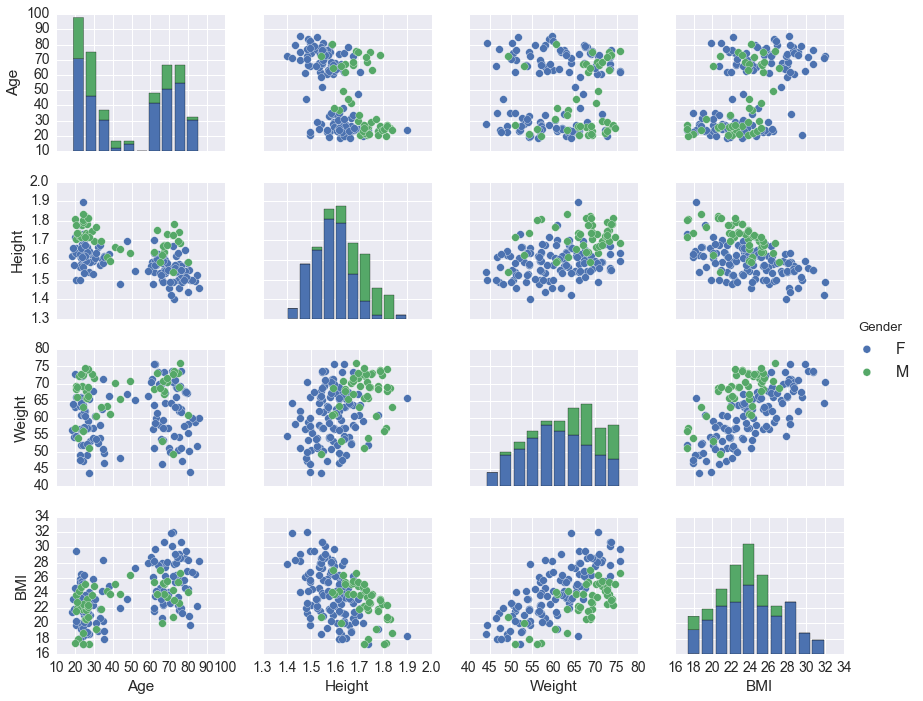

In [10]:
sns.pairplot(info[['Age', 'Gender', 'Height', 'Weight', 'BMI']], hue='Gender',
             size=2.5, aspect=1.2, plot_kws={'s':60})
plt.show()

From figure above, we can see a biomodal distribution for the age characteristic; data are from young subjects, mostly between 20 and 30 yrs. old, and from elderly subjects, between 60 and 80 yrs. old. Men are slightly taller and heavier than women but they seem to have similar BMI.

## Fallers

Let's see how many subjects fell at least once in the last 12 months:

In [11]:
info[['AgeGroup', 'Falls12m']][info.Falls12m > 0].groupby(['AgeGroup']).count()

,Falls12m
AgeGroup,
Old,19
Young,23


So, surprisingly the number of young and elderly subjects who fell at least once in the last 12 months are similar (21% of tle elderly adults and 23% of the young adults fell).

 ## Qualitative evaluations
 
 Let's see the results for the Short Falls Efficacy Scale International test (FES-I), Mini Balance Evaluation Systems Test (Mini-BESTest), International Physical Activity Questionnaire Short Version (IPAQ); and Trail Making Test (TMT).
 
 The IPAQ data scores are coded as 'Low', 'Moderate' and 'High'; let's convert to numbers, '0', '1' and '2', for comparing with the other evaluations:

In [12]:
info.loc[info.IPAQ_S=='Low', 'IPAQ_S'] = 0
info.loc[info.IPAQ_S=='Moderate', 'IPAQ_S'] = 1
info.loc[info.IPAQ_S=='High', 'IPAQ_S'] = 2

c:\miniconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


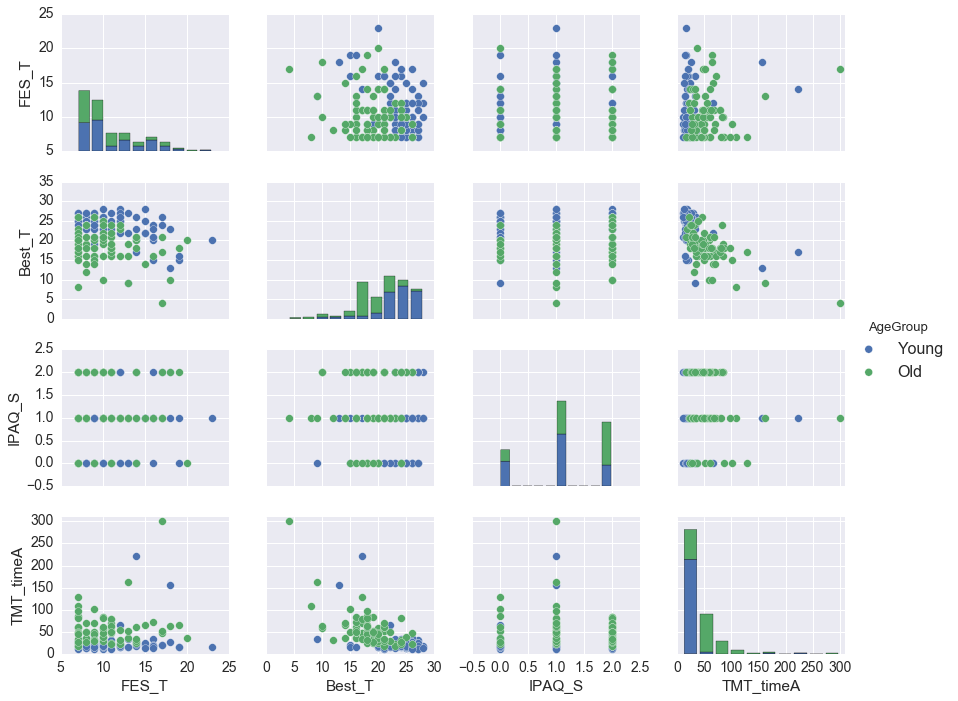

In [13]:
g = sns.pairplot(info[['AgeGroup', 'FES_T', 'Best_T', 'IPAQ_S', 'TMT_timeA']], hue='AgeGroup',
             size=2.5, aspect=1.2, plot_kws={'s':60})
axes = g.axes
for i in range(4):
    axes[i,3].set_xlim(0,310)
    axes[3,i].set_ylim(0,310)
plt.show()

## Quantitative evaluation

The raw data from the stabilography evaluation, composed by the force platform signals plus the center of pressure (COP), in the anterior-posterior (ap), and medio-lateral (ml) directions, are stored in other files (1930 files!); the BSDinfo file just stores the names of these files according to subject's name and conditions.  
Here is an examplary plot of the eight signals (3 forces, 3 moments of force and 2 COPs) of the first trial of the first subject:

In [14]:
path2 = r'./../../../X/BDB/'  # path for the raw COP data
filename = os.path.join(path2, 'BDS00038.txt')
grf = pd.read_csv(filename, delimiter='\t', skiprows=1, header=None,
                  names=['Time','Fx','Fy','Fz','Mx','My','Mz','COPx','COPy'], engine='c')

In [16]:
def bdb_plot_grf(grf):
    
    Funits = 'N'
    Munits = 'Nm'
    COPunits = 'cm'
    t, Fx, Fy, Fz, Mx, My, Mz, COPx, COPy = [_ for _ in grf.values.T]

    plt.figure(figsize=(14, 8))

    gs1 = gridspec.GridSpec(3, 2)
    gs1.update(bottom=0.5, top=0.95, hspace=0.12, wspace=.15)
    ax1 = plt.subplot(gs1[0, 0])
    ax2 = plt.subplot(gs1[1, 0])
    ax3 = plt.subplot(gs1[2, 0])
    ax4 = plt.subplot(gs1[0, 1])
    ax5 = plt.subplot(gs1[1, 1])
    ax6 = plt.subplot(gs1[2, 1])

    gs2 = gridspec.GridSpec(3, 3)
    gs2.update(bottom=0.08, top=0.42, wspace=0.25)
    ax7 = plt.subplot(gs2[:, :-1])
    ax8 = plt.subplot(gs2[:, 2])

    ax1.set_ylabel('Fx (%s)' %Funits)
    ax1.set_xticklabels([]), ax1.locator_params(axis='y', nbins=4)
    ax1.yaxis.set_label_coords(-.14, 0.5)
    ax2.set_ylabel('Fy (%s)' %Funits)
    ax2.set_xticklabels([]), ax2.locator_params(axis='y', nbins=4)
    ax2.yaxis.set_label_coords(-.14, 0.5)
    ax3.set_ylabel('Fz (%s)' %Funits)
    ax3.locator_params(axis='y', nbins=4)
    ax3.yaxis.set_label_coords(-.14, 0.5)
    ax3.set_xlabel('Time (s)')
    ax4.set_ylabel('Mx (%s)' %Munits)
    ax4.set_xticklabels([]), ax4.locator_params(axis='y', nbins=4)
    ax4.yaxis.set_label_coords(-.1, 0.5)
    ax5.set_ylabel('My (%s)' %Munits)
    ax5.set_xticklabels([]), ax5.locator_params(axis='y', nbins=4)
    ax5.yaxis.set_label_coords(-.1, 0.5)
    ax6.set_ylabel('Mz (%s)' %Munits)
    ax6.locator_params(axis='y', nbins=4)
    ax6.yaxis.set_label_coords(-.1, 0.5)
    ax6.set_xlabel('Time (s)')
    ax7.set_xlabel('Time (s)')
    ax7.set_ylabel('COP (%s)' %COPunits)
    ax8.set_xlabel('COPml (%s)' %COPunits)
    ax8.set_ylabel('COPap (%s)' %COPunits)

    ax1.plot(t, Fx)
    ax2.plot(t, Fy)
    ax3.plot(t, Fz)
    ax4.plot(t, Mx)
    ax5.plot(t, My)
    ax6.plot(t, Mz)
    ax7.plot(t, COPx, 'b', label='COP ap')
    ax7.plot(t, COPy, 'r', label='COP ml')
    ax7.yaxis.set_label_coords(-.1, 0.5)
    ax7.legend(fontsize=12, loc='best', framealpha=.5)
    ax8.plot(COPy, COPx)
    ax8.locator_params(axis='both', nbins=5)
    plt.suptitle('Ground reaction force data during quiet standing', fontsize=20, y=1)

    plt.show()

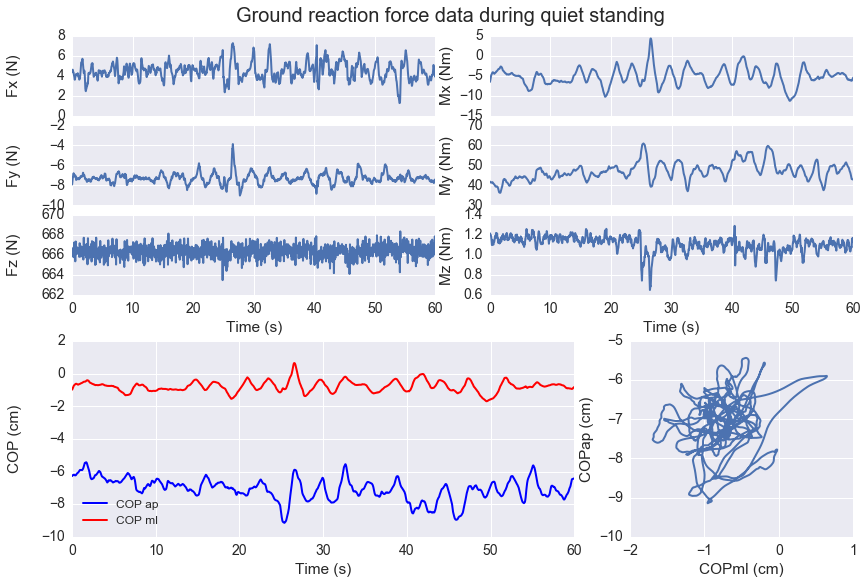

In [17]:
bdb_plot_grf(grf)

Let's load all files from the stabilography evaluation and calculate some variables to quantify the stabilography data. The notexbook http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/Stabilography.ipynb describes some of the most typical measurements employed to quantify postural sway using the COP data.  
Let's calculate here the variables COP area COP mean velocity (resultant), and COP frequency (resultant).

In [18]:
# import the python functions to calculate the COP variables
from psd import psd
from hyperellipsoid import hyperellipsoid

def COPmfreq(COP, freq):
    N = COP.shape[0]
    fp_ap, mf_ap, fmax_ap, Ptot_ap, F, P_ap = psd(COP[:, 0], fs=freq, window='hanning', nperseg=N/2,
                                                  noverlap=N/4, nfft=N/2, detrend='constant', show=False)
    fp_ml, mf_ml, fmax_ml, Ptot_ml, F, P_ml = psd(COP[:, 1], fs=freq, window='hanning', nperseg=N/2,
                                                  noverlap=N/4, nfft=N/2, detrend='constant', show=False)
    mf_res = (mf_ap*np.sum(P_ap) + mf_ml*np.sum(P_ml))/(np.sum(P_ap)+np.sum(P_ml))
    #print(mf_ap, mf_ml, mf_res)
    return mf_res

In [18]:
from scipy.signal import detrend

fp = FloatProgress(min=0, max=len(BDSinfo.Trial)-1)
display(fp)
path2 = r'./../../../X/BDB/'  # path for the raw COP data
freq = 100
for i, fname in enumerate(BDSinfo.Trial):
    filename = os.path.join(path2, fname + '.txt')
    fp.description = 'Reading data from file %s (%s/%s)/n' %(os.path.basename(filename), i+1, len(BDSinfo.Trial))
    fp.value = i
    grf = pd.read_csv(filename, delimiter='\t', skiprows=1, header=None,
                      names=['Time','Fx','Fy','Fz','Mx','My','Mz','COPx','COPy'], engine='c')   
    COP = grf[['COPx', 'COPy']].values
    # discard the first 5s for the accomodation period
    #grf = grf.iloc[5*freq:, :]
    #COP = COP[5*freq:, :]
    #COP = detrend(COP, axis=0, type='linear')
    area, axes, angles, center, R = hyperellipsoid(COP, show=False)
    velo = np.sum(np.abs(np.sqrt(np.sum(np.diff(COP, axis=0)**2, axis=1))), axis=0)/(COP.shape[0]/freq)   
    mfreq = COPmfreq(COP, freq)
    BDSinfo.loc[i, 'COParea'] = area
    BDSinfo.loc[i, 'COPvelo'] = velo
    BDSinfo.loc[i, 'COPmfreq'] = mfreq
    
BDSinfo.to_csv(os.path.join(path, 'BDSinfoCOP.txt'), sep='\t', encoding='utf-8', index=False)
BDSinfo.to_excel(os.path.join(path, 'BDSinfoCOP.xlsx'), index=False)
print('Data from %d files were processed.' %len(BDSinfo.Trial))

Data from 1930 files were processed.


In [19]:
# read file with all metadata and COP variables from the GitHub repo:
fname = 'https://raw.githubusercontent.com/demotu/datasets/master/Balance/BDSinfoCOP.txt'
fname = os.path.join(path, 'BDSinfoCOP.txt')
BDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print("Information from %s files successfully loaded (total of %s subjects)."
      %(len(BDSinfo), len(pd.unique(BDSinfo.Subject))))

Information from 1930 files successfully loaded (total of 163 subjects).


In [21]:
display(BDSinfo[['Trial', 'Subject', 'Vision', 'Surface', 'COParea', 'COPvelo', 'COPmfreq']].head(15))
#qgrid.show_grid(BDSinfo[['Trial', 'Subject', 'AgeGroup', 'Vision', 'Surface', 'COParea', 'COPvelo', 'COPmfreq']])

,Trial,Subject,Vision,Surface,COParea,COPvelo,COPmfreq
0,BDS00001,1,Open,Firm,0.9,0.6,0.3
1,BDS00002,1,Open,Firm,1.1,0.7,0.1
2,BDS00003,1,Open,Firm,0.5,0.7,0.3
3,BDS00004,1,Closed,Firm,0.5,0.6,0.3
4,BDS00005,1,Closed,Firm,1.5,0.7,0.2
5,BDS00006,1,Closed,Firm,0.4,0.6,0.4
6,BDS00007,1,Open,Foam,3.9,2.0,0.4
7,BDS00008,1,Open,Foam,3.0,2.0,0.5
8,BDS00009,1,Open,Foam,3.5,1.8,0.4
9,BDS00010,1,Closed,Foam,6.5,2.1,0.3


Because we have 3 trials per condition for each subject, let's take the median across trials for each subject as representative of the subject:

In [22]:
BDSinfo = BDSinfo.groupby(['Subject','Vision','Surface','Illness','Disability','AgeGroup'], as_index=False).median()
display(BDSinfo[['Subject', 'Vision', 'Surface', 'COParea', 'COPvelo', 'COPmfreq']].head(12))
#qgrid.show_grid(BDSinfo[['Subject', 'Vision', 'Surface', 'COParea', 'COPvelo', 'COPmfreq']])
print('%s subjects.' %len(pd.unique(BDSinfo.Subject)))

,Subject,Vision,Surface,COParea,COPvelo,COPmfreq
0,1,Closed,Firm,0.5,0.6,0.3
1,1,Closed,Foam,5.9,1.9,0.3
2,1,Open,Firm,0.9,0.7,0.3
3,1,Open,Foam,3.5,2.0,0.4
4,2,Closed,Firm,0.9,0.6,0.2
5,2,Closed,Foam,11.0,2.0,0.3
6,2,Open,Firm,0.6,0.5,0.2
7,2,Open,Foam,7.6,1.6,0.3
8,3,Closed,Firm,2.3,1.2,0.2
9,3,Closed,Foam,15.2,3.7,0.4


163 subjects.


Once again, if desired do not consider the subjects with disabilities because their numbers are unbalanced in the age groups (uncomment the code below):

In [23]:
#BDSinfo = BDSinfo.ix[BDSinfo.Disability=='No']

Number of subjects without disabilities in the data set:

In [24]:
BDSinfo.drop_duplicates(subset='Subject')[['AgeGroup', 'Subject']].groupby(['AgeGroup']).count()

,Subject
AgeGroup,
Old,76
Young,87


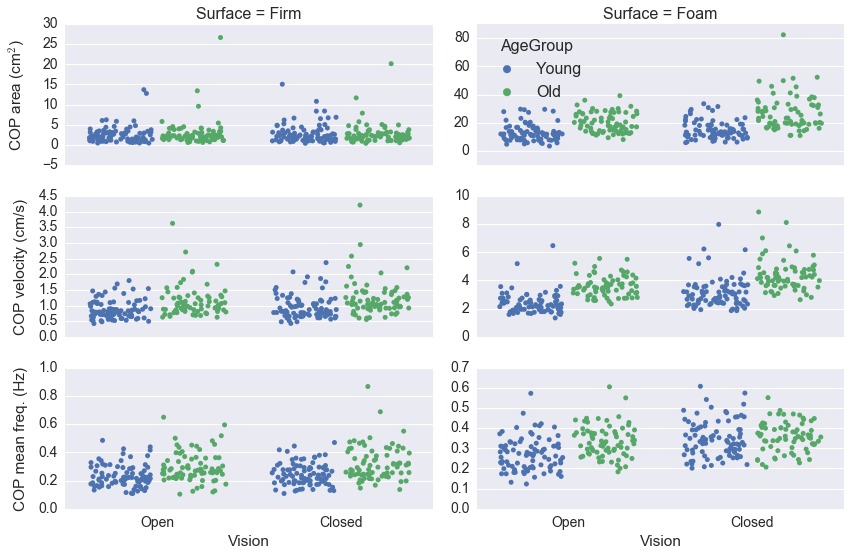

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8))

sns.stripplot(x='Vision', y='COParea', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo[BDSinfo.Surface=='Firm'],
               jitter=.35, split=True, size=4, ax=ax[0,0], s=5)
ax[0,0].set_xlabel('')
ax[0,0].set_xticklabels('')
ax[0,0].set_ylabel('COP area (cm$^2$)')
ax[0,0].yaxis.set_label_coords(-.1, .5)
ax[0,0].legend('')
ax[0,0].set_title('Surface = Firm', fontsize=16)
sns.stripplot(x='Vision', y='COParea', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo[BDSinfo.Surface=='Foam'],
               jitter=.35, split=True, size=4, ax=ax[0,1], s=5)
ax[0,1].set_xlabel('')
ax[0,1].set_xticklabels('')
ax[0,1].set_ylabel('')
ax[0,1].legend(title='AgeGroup', loc='upper left')
ax[0,1].set_title('Surface = Foam', fontsize=16)

sns.stripplot(x='Vision', y='COPvelo', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo[BDSinfo.Surface=='Firm'],
               jitter=.35, split=True, size=4, ax=ax[1,0], s=5)
ax[1,0].set_xlabel('')
ax[1,0].set_xticklabels('')
ax[1,0].set_ylabel('COP velocity (cm/s)')
ax[1,0].yaxis.set_label_coords(-.1, .5)
ax[1,0].legend('')
sns.stripplot(x='Vision', y='COPvelo', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo[BDSinfo.Surface=='Foam'],
               jitter=.35, split=True, size=4, ax=ax[1,1], s=5)
ax[1,1].set_xlabel('')
ax[1,1].set_xticklabels('')
ax[1,1].set_ylabel('')
ax[1,1].legend('')

sns.stripplot(x='Vision', y='COPmfreq', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo[BDSinfo.Surface=='Firm'],
               jitter=.35, split=True, size=4, ax=ax[2,0], s=5)
ax[2,0].set_ylabel('COP mean freq. (Hz)')
ax[2,0].yaxis.set_label_coords(-.1, .5)
ax[2,0].legend('')

sns.stripplot(x='Vision', y='COPmfreq', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo[BDSinfo.Surface=='Foam'],
               jitter=.35, split=True, size=4, ax=ax[2,1], s=5)
ax[2,1].set_ylabel('')
ax[2,1].legend('')

plt.tight_layout()
plt.show()

**Figure. Plot of the variables COP area, COP velocity and COP mean frequency for each subject by age group at the different conditions.**

The mean and standard deviation values for the variables COP area, COP velocity and COP mean frequency are:

In [26]:
pd.set_option('precision', 3)
BDSinfo.groupby(['AgeGroup', 'Vision', 'Surface'])['COParea', 'COPvelo', 'COPmfreq'].agg([np.mean, np.std])

COParea         COPvelo        COPmfreq       
                           mean     std    mean    std     mean    std
AgeGroup Vision Surface                                               
Old      Closed Firm      2.763   2.650   1.222  0.559    0.324  0.121
                Foam     26.884  12.219   4.375  1.111    0.357  0.073
         Open   Firm      2.906   3.348   1.130  0.489    0.296  0.106
                Foam     20.102   6.908   3.595  0.719    0.335  0.078
Young    Closed Firm      2.860   2.385   0.956  0.376    0.246  0.078
                Foam     14.931   6.230   3.135  1.055    0.346  0.089
         Open   Firm      2.492   2.149   0.870  0.301    0.234  0.079
                Foam     12.893   5.945   2.384  0.734    0.270  0.081

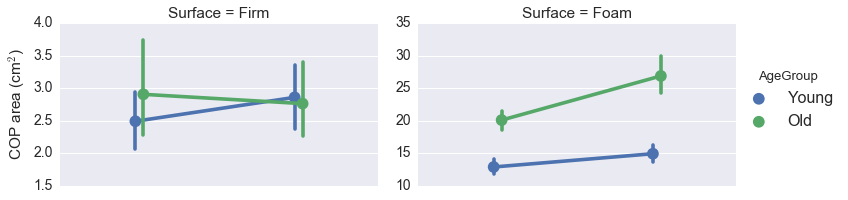

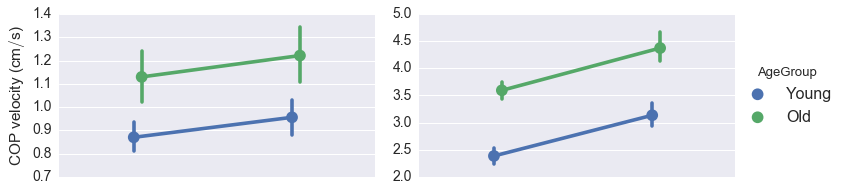

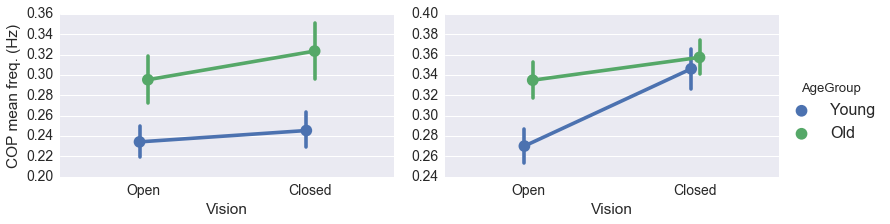

In [27]:
g0 = sns.factorplot(x='Vision', y='COParea', hue='AgeGroup', order=['Open', 'Closed'],
                    data=BDSinfo, estimator=np.mean, ci=95,
                    col='Surface', kind='point', dodge=True, sharey=False, size=3.5,
                    aspect=1.5)
g0.set_xticklabels('')
g0.set_axis_labels('', 'COP area (cm$^2$)')
g1 = sns.factorplot(x='Vision', y='COPvelo', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo,
                    estimator=np.mean, ci=95,
                    col='Surface', kind='point', dodge=True, sharey=False, size=3.5, aspect=1.5)
g1.set_axis_labels('', 'COP velocity (cm$/$s)')
g1.set_titles('','')
g1.set_xticklabels('')
g2 = sns.factorplot(x='Vision', y='COPmfreq', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo,
                    estimator=np.mean, ci=95,
                    col='Surface', kind='point', dodge=True, sharey=False, size=3.5, aspect=1.6)
g2.set_axis_labels('Vision', 'COP mean freq. (Hz)')
g2.set_titles('','')
plt.show()

**Figure. Plot of the mean and 95% CI for the variables COP area and COP velocity across subjects by age group at the different conditions.**

Here are scatter plots of the COP variables for the most challenging condition (Surface=Foam and Vision=Closed):

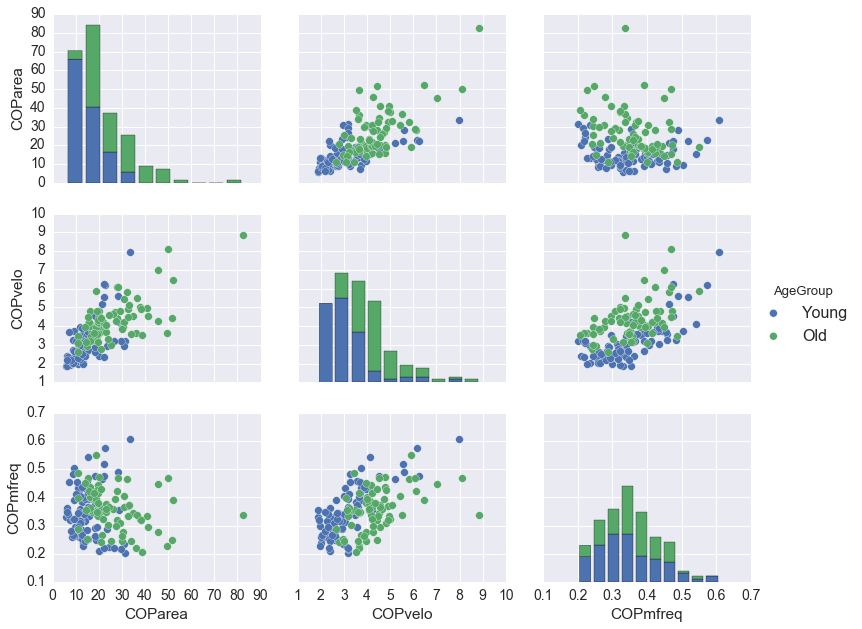

In [28]:
data = BDSinfo[(BDSinfo.Surface=='Foam') & (BDSinfo.Vision=='Closed')]
sns.pairplot(data[['AgeGroup', 'COParea', 'COPvelo', 'COPmfreq']], hue='AgeGroup', size=3, aspect=1.2, plot_kws={'s':60})
plt.show()